In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline  

In [2]:
master = pd.read_csv('master_target_list.csv')
specmatch = pd.read_csv('specmatch_results.csv')
keck = pd.read_csv('keck_st.csv')

# Merge tables, make specmatch names lowercase.

In [3]:
lower_names = [str(specmatch['name'][i]).lower() for i in np.arange(len(specmatch))]
specmatch['name'] = lower_names
specmatch = specmatch.drop_duplicates(subset='name')
specmatch = specmatch.sort_values(by='name')

lower_names_master = [str(master['name'][i]).lower() for i in np.arange(len(master))]
master['name'] = lower_names_master
master = master.sort_values(by='name')

lower_names_keck = [keck['NAME'][i].lower() for i in np.arange(len(keck))]
keck['NAME'] = lower_names_keck
keck = keck.sort_values(by='NAME')

In [4]:
#Remove specmatch stars that are not also in master.
merge = specmatch.merge(master,on=['name','name'])

#merge = pd.concat([master, specmatch])
merge.to_csv('merge_stellar_data.csv')

In [5]:
merge_keck = keck.merge(master,on=['NAME','name'])

#merge = pd.concat([master, specmatch])
merge_keck.to_csv('merge_keck_activity.csv')

KeyError: 'name'

In [8]:
keck['NAME']

1791            1386
1810            5215
1823            7830
1831           10072
1850           13398
1860           15312
1964           36635
2022           50341
2047           55915
2071           60357
2072           60633
2107           66283
2117           67842
2153           74346
2189           80096
2206           82408
2208           82834
2268           96561
2276           98381
2335          112120
2364          117966
1841    0050-00027-1
1924    0122-01118-1
1972    0181-01497-1
2221    0408-01270-1
2259    0466-02991-1
1950    0748-01711-1
135            10002
136            10008
1362           10011
            ...     
2373         v819tau
2374         v836tau
1649      vulcan5270
2417          wasp-1
2418          wasp-2
2419          wasp-3
2424          wasp-7
2425          wasp10
2426          wasp12
2427          wasp13
2428          wasp14
2429          wasp15
2430          wasp16
2431          wasp17
2432          wasp18
2433          wasp19
2574         

# Select for SpecMatch stars?

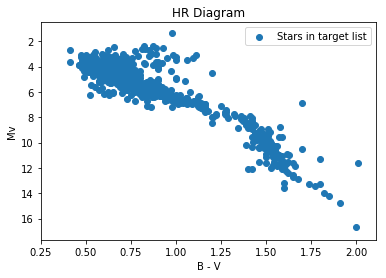

In [5]:
fig = plt.figure()
plt.title('HR Diagram')
ax = fig.add_subplot(111)
ax.scatter(master_target['BV'], master_target['MV'], label='Stars in target list')
ax.set_xlabel('B - V')
ax.set_ylabel('Mv')
ax.set_ylim([np.amax(master_target['MV'])+1, 0.5])
ax.set_xlim([0.25, np.amax(master_target['BV'])+0.1])
ax.legend()

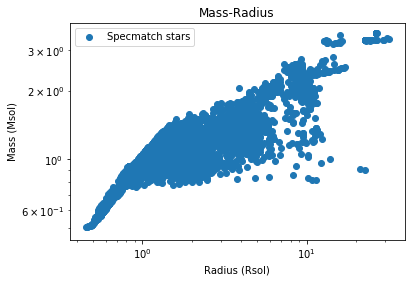

In [6]:
fig2 = plt.figure()
plt.title('Mass-Radius')
ax2 = fig2.add_subplot(111)
ax2.scatter(specmatch['iso_radius'], specmatch['iso_mass'], label='Specmatch stars')
ax2.set_xlabel('Radius (Rsol)')
ax2.set_ylabel('Mass (Msol)')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend()

# Make a bunch of SpecMatch histograms.

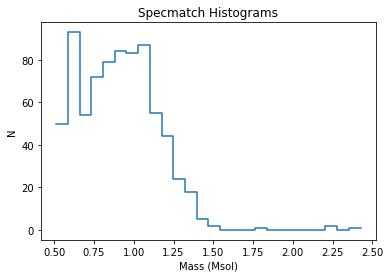

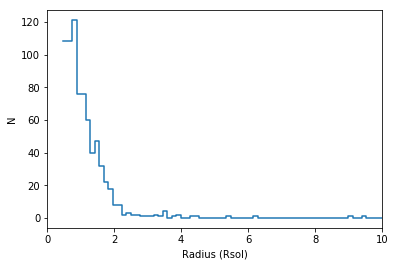

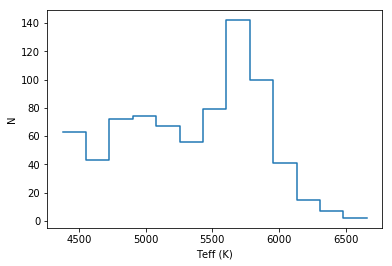

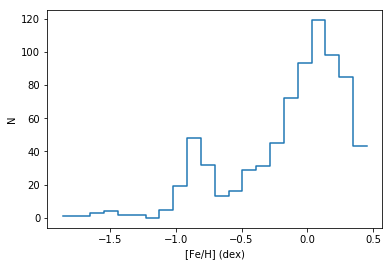

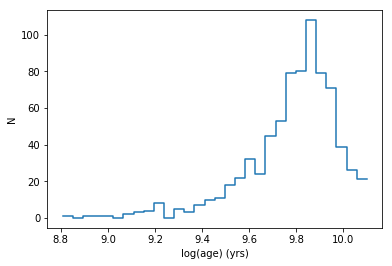

In [48]:
masses = merge['iso_mass'][~np.isnan(merge['iso_mass'])]
radiuses = merge['iso_radius'][~np.isnan(merge['iso_radius'])]
teffs = merge['teff'][~np.isnan(merge['teff'])]
fes = merge['fe'][~np.isnan(merge['fe'])]
logages = merge['iso_logage'][~np.isinf(merge['iso_logage'])][~np.isnan(merge['iso_logage'])]
#n, bins, patches = hax1.hist(specmatch['iso_mass'], 100, normed=1, facecolor='green', alpha=0.75)
#hax1.hist(specmatch['iso_mass'], bins=100)

masshist = plt.figure()
plt.title('Specmatch Histograms')
hax1 = masshist.add_subplot(111)
hist, bin_edges = np.histogram(masses, bins='fd')
hax1.plot(bin_edges, np.insert(hist, 0, hist[0]), '-', drawstyle='steps')
hax1.set_xlabel('Mass (Msol)')
hax1.set_ylabel('N')
#hax1.set_xlim([0.5,1])

radhist = plt.figure()
hax2 = radhist.add_subplot(111)
hist, bin_edges = np.histogram(radiuses, bins='fd')
hax2.plot(bin_edges, np.insert(hist, 0, hist[0]), '-', drawstyle='steps')
hax2.set_xlabel('Radius (Rsol)')
hax2.set_ylabel('N')
hax2.set_xlim([0,10])

teffhist = plt.figure()
hax3 = teffhist.add_subplot(111)
hist, bin_edges = np.histogram(teffs, bins='fd')
hax3.plot(bin_edges, np.insert(hist, 0, hist[0]), '-', drawstyle='steps')
hax3.set_xlabel('Teff (K)')
hax3.set_ylabel('N')

fehist = plt.figure()
hax4 = fehist.add_subplot(111)
hist, bin_edges = np.histogram(fes, bins='fd')
hax4.plot(bin_edges, np.insert(hist, 0, hist[0]), '-', drawstyle='steps')
#hax4.axvline(x=-1.84,c='r')
hax4.set_xlabel('[Fe/H] (dex)')
hax4.set_ylabel('N')

agehist = plt.figure()
hax5 = agehist.add_subplot(111)
hist, bin_edges = np.histogram(logages, bins='fd')
hax5.plot(bin_edges, np.insert(hist, 0, hist[0]), '-', drawstyle='steps')
hax5.set_xlabel('log(age) (yrs)')
hax5.set_ylabel('N')

# Check 0.6 Msol stars, in whole spec list.

In [42]:
weird_mass = merge.loc[np.abs(merge['iso_mass'] - 0.6) <= 0.075]

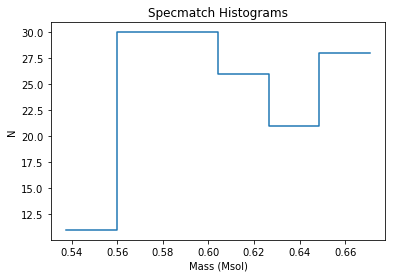

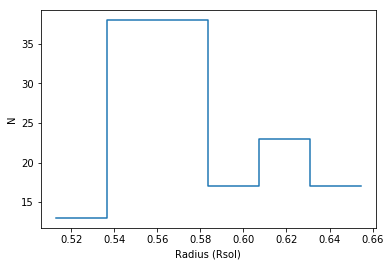

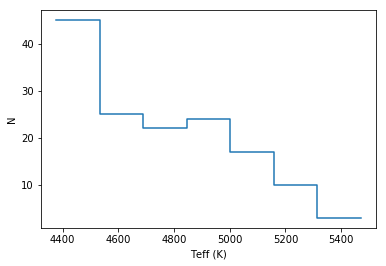

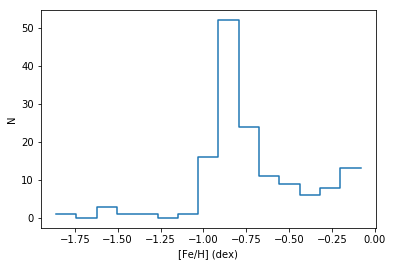

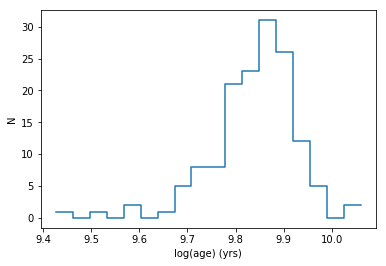

In [47]:
mmasses = weird_mass['iso_mass'][~np.isnan(weird_mass['iso_mass'])]
mradiuses = weird_mass['iso_radius'][~np.isnan(weird_mass['iso_radius'])]
mteffs = weird_mass['teff'][~np.isnan(weird_mass['teff'])]
mfes = weird_mass['fe'][~np.isnan(weird_mass['fe'])]
mlogages = weird_mass['iso_logage'][~np.isinf(weird_mass['iso_logage'])][~np.isnan(weird_mass['iso_logage'])]
#n, bins, patches = hax1.hist(specmatch['iso_mass'], 100, normed=1, facecolor='green', alpha=0.75)
#hax1.hist(specmatch['iso_mass'], bins=100)

masshist = plt.figure()
plt.title('Specmatch Histograms')
hax1 = masshist.add_subplot(111)
hist, bin_edges = np.histogram(mmasses, bins='fd')
hax1.plot(bin_edges, np.insert(hist, 0, hist[0]), '-', drawstyle='steps')
hax1.set_xlabel('Mass (Msol)')
hax1.set_ylabel('N')
#hax1.set_xlim([0.5,1])

radhist = plt.figure()
hax2 = radhist.add_subplot(111)
hist, bin_edges = np.histogram(mradiuses, bins='fd')
hax2.plot(bin_edges, np.insert(hist, 0, hist[0]), '-', drawstyle='steps')
hax2.set_xlabel('Radius (Rsol)')
hax2.set_ylabel('N')
#hax2.set_xlim([0,10])

teffhist = plt.figure()
hax3 = teffhist.add_subplot(111)
hist, bin_edges = np.histogram(mteffs, bins='fd')
hax3.plot(bin_edges, np.insert(hist, 0, hist[0]), '-', drawstyle='steps')
hax3.set_xlabel('Teff (K)')
hax3.set_ylabel('N')

fehist = plt.figure()
hax4 = fehist.add_subplot(111)
hist, bin_edges = np.histogram(mfes, bins='fd')
hax4.plot(bin_edges, np.insert(hist, 0, hist[0]), '-', drawstyle='steps')
hax4.set_xlabel('[Fe/H] (dex)')
hax4.set_ylabel('N')

agehist = plt.figure()
hax5 = agehist.add_subplot(111)
hist, bin_edges = np.histogram(mlogages, bins='fd')
hax5.plot(bin_edges, np.insert(hist, 0, hist[0]), '-', drawstyle='steps')
hax5.set_xlabel('log(age) (yrs)')
hax5.set_ylabel('N')

# Calculate stellar activity measures, check.

## Use Isaacson 2010, which measure? S, R'hk.